<a href="https://colab.research.google.com/github/gtsu070701/bigdata_license/blob/main/3type_previos_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 작업3유형 - 통계분석 문제모음

### 3-01. 예시문제-t검정, 로지스틱회귀

**3-01.혈압 전/후 차이 검정**

주어진 데이터(data/blood_pressure.csv)에는 고혈압 환자 120명의 치료 전후의 혈압이 저장되어 있다. 해당 치료가 효과가 있는지 (즉, 치료 후의 혈압이 감소했는지) 쌍체표본 t-검정(paired t-test)를 통해 답하고자 한다.
가설은 아래와 같다


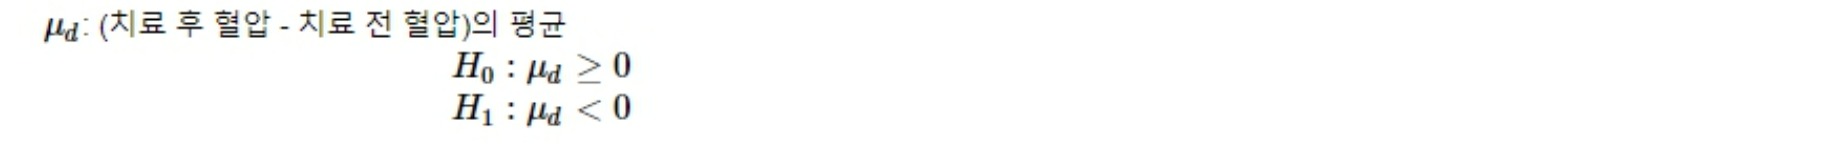

bp_before : 치료 전 혈압, bp_after : 치료 후 혈압
- (a) ud의 표본 평균을 구하시오 (반올림하여 소수 둘째자리까지 계산)
- (b) 위의 가설을 검정하기 위한 검정통계량을 입력하시오.(반올림하여 소수 넷째자리까지 계산)
- (c) 위의 통계량에 대한 p-값을 구하여 입력하시오. (반올림하여 소수 넷째자리까지 계산)
- (d) 유의수준 0.05 하에서 가설검정의 결과를 (채택/기각) 중 하나를 선택하여 입력하시오.

In [ ]:
import pandas as pd
from scipy.stats import ttest_rel, ttest_1samp

a = pd.read_csv("https://raw.githubusercontent.com/Soyoung-Yoon/data_02/main/blood_pressure.csv")
print(a.head())

   patient   sex agegrp  bp_before  bp_after
0        1  Male  30-45        143       153
1        2  Male  30-45        163       170
2        3  Male  30-45        153       168
3        4  Male  30-45        153       142
4        5  Male  30-45        146       141


In [ ]:
before, after = a['bp_before'], a['bp_after']

diff = after - before    #  ud < 0
statistic, pvalue = ttest_rel(after, before, alternative='less')
#statistic, pvalue = ttest_1samp(after - before, 0, alternative='less')
print(round(diff.mean(), 2))
print(round(statistic, 2))
print(round(pvalue, 4))
print('기각' if pvalue < 0.05 else '채택')

-5.09
-3.34
0.0006
기각


In [ ]:
# 식으로 구해본 검정통계량
statistic = (diff.mean()-0)/(diff.std()/120**0.5)
print(statistic)

-3.337187051083365


**3-02.타이타닉호 침몰 사건**

제공된 데이터(Titanic.csv)는 타이타닉호의 침몰 사건에서 생존한 승객 및 사망한 승객의 정보를 포함한 자료이다. 아래 데이터를 이용하여 생존여부(Survived)를 예측하고자 한다. 각 문항의 답을 [제출 형식]에 맞춰 답안 작성 페이지에 입력하시오.

제공 데이터
- PassengerId : 승객 번호
- Survivied: 생존여부 (1: 생존, 0: 사망)
- Pclass: 좌석 등급 (1등급, 2등급, 3등급)
- Name : 승객 이름
- Gender: 성별 ('male': 남성, 'female': 여성)
- Age: 연령
- Sibsp: 동반한 형제/자매 및 배우자 수
- Parch: 동반한 부모 및 자녀 수
- Ticket: 티켓번호
- Fare: 티켓의 요금(달러)
- Cabin: 객실 번호
- Embarked: 탑승지 위치(C: Cherbourg, Q: Queenstown, S: Southampton)

1) Gender와 Survived 변수 간의 독립성 검정을 실시하였을 때, 카이제곱 통계량은? (반올림하여 소수 셋째 자리까지 계산)

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/titanic_dataq.csv')
print(df.head(3))
ctab = pd.crosstab(df['Gender'], df['Survived'])
statistic, pvalue, dof, expected = chi2_contingency(ctab)
result1 = round(statistic, 3)
print(result1) # 260.717
#print(pvalue) # 1.1973570627755645e-58
# 귀무가설 기각, 대립가설 채택 - 독립이 아니다.

   PassengerId  Survived  Pclass                                               Name  Gender     Age  SibSp  Parch            Ticket    Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male 22.0000      1      0         A/5 21171  7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.0000      1      0          PC 17599 71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female 26.0000      0      0  STON/O2. 3101282  7.9250   NaN        S
260.717


> 2), 3)번 풀이 영상 교체 예정입니다. (25년 3월 17일)

2) Gender, SibSp, Parch, Fare를 독립변수로 사용하여 로지스틱 회귀모형을 실시하였을 때, Parch 변수의 계수값은? (반올림하여 소수 셋째 자리까지 계산)

In [ ]:
from statsmodels.api import GLM

formula = 'Survived ~ C(Gender) + SibSp + Parch + Fare'
model = GLM.from_formula(formula, df).fit()
print(model.params)
parch_coef = model.params['Parch']
print(round(parch_coef, 3))

Intercept            0.7111
C(Gender)[T.male]   -0.5422
SibSp               -0.0475
Parch               -0.0271
Fare                 0.0018
dtype: float64
-0.027


3) 위 2번 문제에서 추정된 로지스틱 회귀모형에서 SibSp 변수가 한 단위 증가할 때 생존할 오즈비(Odds ratio) 값은? (반올림하여 셋째 자리까지 계산)

In [ ]:
# 오즈비(Odds ratio)
import numpy as np
result3 = np.exp(model.params['SibSp'])
print(round(result3, 3))

0.954


### 3-02. 6회-카이제곱 동질성검정, 다중선형회귀

**3-1.흡연**
- A 도시의 남성 600명과 여성 550명이 있다. 남성들 중 흡연자 비율은 0.2이며 여성들 중 흡연자 비율은 0.26이다.
- 남성과 여성 간에 흡연 여부에 따른 비율이 다른지 확인하고 싶다.
- 유의 수준 0.05에서 귀무가설에 대해 기각 / 채택 여부와 p-value값을 각각 출력하라 (반올림하여 소숫점아래 3자리까지 출력)


In [ ]:
from scipy.stats import chisquare  # 적합도 (범주형변수1개)
from scipy.stats import chi2_contingency # 동질성, 독립성 (범주형변수2개)

In [ ]:
# 6-3-1 (1)
import pandas as pd
from scipy.stats import chi2_contingency
crs_tab = pd.DataFrame({'흡연': [600*0.2, 550*0.26], '비흡연':[600*0.8, 550*0.74]},
                       index=['남성', '여성'], dtype='int')
crs_tab = crs_tab.T   # 행/열의 변환에도 결과는 동일함
print(crs_tab)
statistic, pvalue, dof, expeced_freq = chi2_contingency(crs_tab)
print('채택' if pvalue > 0.05 else '기각')  # pvalue == 0.05 ('기각')
print(round(pvalue, 3))

      남성   여성
흡연   120  143
비흡연  480  407
기각
0.019


- 데이터가 파일로 주어진다면 직접 교차표를 만들어 사용하도록 한다.
- https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/gender_smoke_data.csv

In [ ]:
# 6-3-1 (2)
import pandas as pd
from scipy.stats import chi2_contingency
fileurl = 'https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/gender_smoke_data.csv'
df = pd.read_csv(fileurl)
#print(df.head())
crs_tab = pd.crosstab(df['Gender'].astype('category').cat.codes,
                      df['Smoke'].astype('category').cat.codes)
#print(crs_tab)
statistic, pvalue, dof, expeced_freq = chi2_contingency(crs_tab)
print('채택' if pvalue > 0.05 else '기각')  # pvalue == 0.05 ('기각')
print(round(pvalue, 3))

기각
0.019


**3-2.콜레스테롤**
- 연령과 몸무게, 콜레스테롤 수치 데이터를 사용해 다음을 답하여라.
- 연령 몸무게 콜레스테롤 수치 데이터 데이터 출처 : https://www.kaggle.com/datasets/hangawqadir/erbil-heart-disease-dataset
- 1) age와 cholesterol을 가지고 weight를 예측하는 선형 회귀 모델을 만들려고한다. age의 회귀 계수를 구하여라
- 2) age가 고정일 때 cholesterol와 weight가 선형관계에 있다는 가설을 유의수준 0.05하에 검정하라
- 3) age가 55, Cholesterol가 72.6일때 위 모델을 기반으로 weight값을 예측하라.

- 선형회귀의 귀무가설 : 회귀 모델의 기울기가 0이다
즉, 독립 변수와 종속 변수는 선형관계가 아니다.
- 선형회귀의 대립가설 : 회귀 모델의 기울기가 0이 아니다.
즉, 독립 변수와 종속 변수는 선형관에 있다.

In [ ]:
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/cholesterol.csv')
df.head(2)

,age,cholesterol,weight
0,65,73.0000,111.0000
1,54,119.0000,81.0000


In [ ]:
# 6-3-2
import pandas as pd
from statsmodels.api import OLS
df= pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/cholesterol.csv')
#print(df.head(2))
formula = 'weight ~ age + cholesterol'
model = OLS.from_formula(formula, df).fit()
#print(model.summary())
result1 = model.params['age']
print(round(result1, 3))

result2 = model.pvalues['cholesterol']
print('선형관계가 아니다' if result2 > 0.05 else '선형관계에 있다')

data = pd.DataFrame({'age': [55], 'cholesterol': [72.6]})
result3 = model.predict(data)[0]
print(round(result3, 3))

-0.036
선형관계에 있다
78.622


### 3type. 7회 - 다중선형회귀, 로지스틱회귀

**3-1. 다중선형회귀모형**

- 'target'의 값을 예측하는 모형을 만든다.(독립변수가 많았음)
- 1) 가장 높은 회귀계수를 구하시오.
- 2) 위 문제에서 적합된 모형 결정계수를 구하시오.
- 3) 가장 높은 p-value를 구하시오.
- 실제 시험에서는 회귀계수, 결정계수, p-value가 각각 0.901, 0.985, 0.052 였다고 합니다 ^^*!
- 예시는 동일한 예제를 구할 수 없어 가상으로 만든 것입니다.


In [58]:
import pandas as pd
from statsmodels.api import OLS, add_constant
df = pd.read_csv('https://raw.githubusercontent.com/gtsu070701/bigdata_license/refs/heads/main/3type_previous_07_mlr_noisy.csv')
#print(df.head())
#print(df.columns)

X = df.drop(columns=['target'])
X = add_constant(X)
y = df['target']

model = OLS(y, X).fit()
#print(model.summary())
# R-squared: 0.985

result = model.params[1:].abs().max()
print(round(result, 3)) #84.177(1번 답)

print(round(model.rsquared, 3)) # 0.985(2번 답)

result3 = model.pvalues[1:].max()
print(round(result3, 3)) #0.996(3번 답)

84.177
0.985
0.996


**[참고] 변수가 많은 경우 formula 만들기**

In [ ]:
import pandas as pd
from statsmodels.api import OLS
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/mlr_noisy.csv')
print(df.columns)
#formula = 'target ~ ' + ' + '.join(df.columns[:-1])
variables = df.drop(columns=['target']).columns
formula = 'target ~ ' + ' + '.join(variables) # 추천
formula = f"target ~ {' + '.join(variables)}" # 추천
model = OLS.from_formula(formula, df).fit()
#print(model.summary())
# R-squared: 0.985
result1 = model.params[1:].abs().max()
print(round(result1, 3))
print(round(model.rsquared, 3))
result3 = model.pvalues[1:].max()
print(round(result3, 3))

#84.177
#0.985
#0.996

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25',
       'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30',
       'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35',
       'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40',
       'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45',
       'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50',
       'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55',
       'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60',
       'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65',
       '

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.api import MNLogit
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

XY = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/health_train.csv')
X_submission = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/health_test.csv')
#XY.head()  # Height_(cm)  Height (cm)
XY.columns = XY.columns.str.replace('(', '').str.replace(')', '').str.replace(' ', '')
XY = XY.drop(columns=['ID'])
X = XY.drop(columns=['General_Health'])
#XY.info()

in_obj = X.select_dtypes(include=['object']).columns
ex_obj = X.select_dtypes(exclude=['object']).columns
#print(in_obj, ex_obj, sep='\n')
formula1 = ' + '.join(ex_obj)
formula2 = ' + '.join(f'C({x})' for x in in_obj)
formula = f'General_Health ~ {formula1} + {formula2}'

#print(formula)
encoder = LabelEncoder()
XY['General_Health'] = encoder.fit_transform(XY['General_Health'])
model = MNLogit.from_formula(formula, XY).fit()
#print(XY['General_Health'])
#print(model.summary())

proba = model.predict(XY)
y_pred = np.argmax(proba, axis=1)

acc = accuracy_score(XY['General_Health'], y_pred)
print(acc)

if False:
    X_submission.columns = X_submission.columns.str.replace('(', '').str.replace(')', '').str.replace(' ', '')
    X_submission = X_submission.drop(columns=['ID'])
    proba = model.predict(X_submission)
    y_pred = np.argmax(proba, axis=1)
    encoder.inverse_transform(y_pred)


Optimization terminated successfully.
         Current function value: 0.888495
         Iterations 7
0.5639968809179013


**[24-06-16] 추가**
- 독립변수가 object 타입인 경우 C(변수명)이 아닌 변수명으로 사용해도 dummy 변수를 만들게 됩니다.


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.api import MNLogit
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

XY = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/health_train.csv')
X_submission = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/health_test.csv')
#XY.head()  # Height_(cm)  Height (cm)
XY.columns = XY.columns.str.replace('(', '').str.replace(')', '').str.replace(' ', '')
XY = XY.drop(columns=['ID'])
X = XY.drop(columns=['General_Health'])
#XY.info()

formula1 = ' + '.join(X.columns)
formula = f'General_Health ~ {formula1}'

#print(formula)
encoder = LabelEncoder()
XY['General_Health'] = encoder.fit_transform(XY['General_Health'])
model = MNLogit.from_formula(formula, XY).fit()
#print(XY['General_Health'])
print(model.summary())

proba = model.predict(XY)
y_pred = np.argmax(proba, axis=1)

acc = accuracy_score(XY['General_Health'], y_pred)
print(acc)

General_Health ~ Checkup + Exercise + Heart_Disease + Skin_Cancer + Other_Cancer + Depression + Diabetes + Arthritis + Sex + Age_Category + Height_cm + Weight_kg + BMI + Smoking_History + Alcohol_Consumption + Fruit_Consumption + Green_Vegetables_Consumption + FriedPotato_Consumption
Optimization terminated successfully.
         Current function value: 0.888495
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:         General_Health   No. Observations:                 8977
Model:                        MNLogit   Df Residuals:                     8907
Method:                           MLE   Df Model:                           68
Date:                Sun, 16 Jun 2024   Pseudo R-squ.:                  0.1860
Time:                        14:52:00   Log-Likelihood:                -7976.0
converged:                       True   LL-Null:                       -9798.2
Covariance Type:            nonrobust   LLR p-value:        

**3-2. 로지스틱 회귀 - GLM 사용**

데이터셋을 210번까지는 학습용 211 - 300번까지는 평가용으로 나누어 사용하도록 한다.
- 'gender'를 종속변수, age, diameter, height, weight를 독립변수를 하는 로지스틱회귀 모형을 만든다.  
- 1) 'weight'를 설명변수로 하였을 때 오즈비는?
- 2) 잔차이탈도(residual deviance) 구하기
- 3) 평가용으로 모형예측한 결과와 실제값의 오차율

In [64]:
# 7-3-1 (오즈비 계산, Residual Deviance 구하기,Error Rate)
import pandas as pd
import numpy as np
from statsmodels.api import GLM, families

df = pd.read_csv('https://raw.githubusercontent.com/gtsu070701/bigdata_license/refs/heads/main/3type_previous_07_gender_classification.csv')
print(df.head(3))

train = df.iloc[:210, ]  # 0 ~ 209
test = df.iloc[210:, ]   # 210 ~ 299
#print(train.shape, test.shape)

formula = 'gender ~ age + diameter + height + weight'
model = GLM.from_formula(formula, train, family=families.Binomial()).fit()
print(model.summary())

# 1) 'weight'를 설명변수로 하였을 때 오즈비는?
result1 = np.exp(model.params['weight'])
print(round(result1, 3))  # 0.997(1번 답)

# 2) 잔차이탈도(residual deviance) 구하기
result2 = model.deviance
print(round(result2, 3)) #57.294(2번 답)

# 3) 평가용으로 모형예측한 결과와 실제값의 오차율
proba = model.predict(test)
#print(proba) # P(Y=1)
y_pred1 = proba.round().astype('int')
y_pred2 = (proba >= 0.5).astype('int')
y_true = test['gender']
result3 = (y_true != y_pred2).mean()  # 비율 -> True의 비율
print(round(result3, 3)) #0.033

   age   diameter      height     weight  gender
0   56  45.305454  158.483995  55.039730       1
1   69  17.548284  182.342418  62.800777       1
2   46  21.154854  169.413419  86.304779       1
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 gender   No. Observations:                  210
Model:                            GLM   Df Residuals:                      205
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28.647
Date:                Fri, 20 Jun 2025   Deviance:                       57.294
Time:                        10:10:09   Pearson chi2:                     69.2
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1743
Covariance Type:            nonrobust                                         
              

In [ ]:
s = pd.Series([True, False, True, False, False])
print(s.mean())

### 3type 8회 - 다중선형회귀, 로지스틱회귀

---



**3-1. 다중선형회귀**

다음의 종속변수와 독립변수를 사용하여 다중선형회귀를 적용하시오.
- 종속변수: PIQ
- 독립변수: Brain, Height, Weight
- 1) 가장 유의미한 변수의 회귀계수를 쓰시오.
- 2) 결정계수값을 구하시오.
- 3) 위에서 구한 모델을 사용하여 키:70, 몸무게:150, 뇌크기:90 인 경우의 PIQ 값을 구하시오.(단, 실수의 경우 반올림하여 소수점 아래 세자리까지 표시되도록 하세요)

In [59]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/gtsu070701/bigdata_license/refs/heads/main/3type_previous_test_iqsize_08032.csv')
#print(df.head(3))

from statsmodels.api import OLS

formula = 'PIQ ~ Brain + Height + Weight'
model = OLS.from_formula(formula, df).fit()
#print(model.summary())

#1) 가장 유의미한 변수의 회귀계수를 쓰시오.
idx = model.pvalues[1:].idxmin()
#print(idx) #Brain
result1 = round(model.params[idx], 3)
print(result1) #2.028(1번 답)

#2) 결정계수값을 구하시오.
#print(dir(model))
result2 = round(model.rsquared, 3)
print(result2) #0.313

# 3) 키:70, 몸무게:150, 뇌크기:90 인 경우의 PIQ 값을 구하시오
#temp = pd.DataFrame([[70, 150, 90]], columns=['Height', 'Weight', 'Brain'])
temp = pd.DataFrame({'Height': [70], 'Weight': [150], 'Brain':[90]})
print(model.predict(temp))

result3 = round(model.predict(temp)[0], 3)
#result3 = round(model.predict(temp), 3) 0    104.768
print(result3) #104.768

2.028
0.313
0    104.768452
dtype: float64
104.768


**3-2. 로지스틱 회귀**

콜센터 데이터를 사용해 로지스틱 회귀를 수행하라.
- 상수항(=절편)을 포함하도록 하며, 규제는 사용하지 않고, 종속변수는 churn(이탈지수)이다.
- 1) 유의성이 낮은 변수의 갯수를 써라
- 2) 유의한 컬럼들을 가지고 다시 모델을 만든 후, 회귀계수의 평균을 구하라.
- 3) 오즈비 구하는 문제, number_customer_calls가 5증가하면 오즈비는 몇 배 증가는가?
   - (단, 실수의 경우 반올림하여 소수점 아래 세자리까지 표시되도록 하세요)

**주의사항**
- 1) 유의성이 낮은 변수의 갯수를 써라  pvalue > 0.05
- 2) 만일 변수의 범위에 절편을 포함하는 것이 아니라면 const를 제외하고 비교하시는 것이 맞습니다.
- 3) 본 기출복원에서는 const의 p-value가 0.05 보다 작아서 포함이든 불포함이든 답이  같습니다.

In [61]:
from statsmodels.api import GLM, add_constant, families
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/gtsu070701/bigdata_license/refs/heads/main/3type_previous_test_churn_08031.csv')
print(df.head(3))

X = df.drop(columns=['churn'])
Y = df['churn']
X = add_constant(X)
#print(X.head(3))

model = GLM(Y, X, family=families.Binomial()).fit()
print(model.summary())

# 1) 유의성이 낮은 변수의 갯수를 써라. (통계적 유의미가 없다 pvalue > 0.05)
result1 = (model.pvalues[1:] > 0.05).sum()
print(result1) #12(1번 답)

# 2) 유의한 컬럼들을 가지고 다시 모델을 만든 후, 회귀계수의 평균을 구하라.Account Length intl_calls number_customer_calls
cond = model.pvalues[1:] <= 0.05
#print(cond) #vmail_message, intl_calls, number_customer_calls
#print(model.pvalues[1:][cond].index)

X = df[['vmail_message', 'intl_calls', 'number_customer_calls']]
X = add_constant(X)

model = GLM(Y, X, family=families.Binomial()).fit()
result2 = model.params.mean()
print(round(result2, 3)) #-0.435(2번 답) #회귀계수는 독립변수(X)가 1단위 증가할 때, 종속변수(Y)가 얼마나 변하는지를 나타내는 값

# 3) 오즈비 구하는 문제, number_customer_calls가 5증가하면 오즈비는 몇 배 증가는가?
result3 = np.exp(model.params['number_customer_calls']*5)
print(round(result3, 3)) #6.511 (3번 답)

   Account Length  vmail_message  Day Mins  Day Calls  Day Charge  Eve Mins  \
0             128             25     265.1        110       45.07     197.4   
1             107             26     161.6        123       27.47     195.5   
2             137              0     243.4        114       41.38     121.2   

   Eve Calls  Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  \
0         99       16.78       244.7           91         11.01       10.0   
1        103       16.62       254.4          103         11.45       13.7   
2        110       10.30       162.6          104          7.32       12.2   

   intl_calls  Intl Charge  number_customer_calls  churn  
0           3         2.70                      1      0  
1           3         3.70                      1      0  
2           5         3.29                      0      0  
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observation

### 3type_9회 - 다중선형회귀, 로지스틱회귀

**3-1. 다중선형회귀**

미술학과의 시험에 관련된 데이터를 사용하여 다음의 값을 구하시오.
- 종속변수 'design', 독립변수 'drawing', 'color_theory', 'composition', 'modeling_3D'
- train : 140개, test : 나머지데이터
- 1) 유의한 변수의 개수는 몇 개인가?
- 2) 1)에서 구한 유의한 변수만 사용하여 다시 모델을 만들고, train 데이터를 사용하여 해당 모델의 예측값과 실제값의 피어슨 상관계수를 구하여라.
- 3) 2)에서 생성된 모델을 사용해 test 데이터에 대한 rmse를 구하여라.

In [62]:
# 여기에 코드를 작성해 보세요.
from statsmodels.api import OLS
from sklearn.metrics import root_mean_squared_error as rmse

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/gtsu070701/bigdata_license/refs/heads/main/3type_previous_test_design_data.csv')
#print(df.head(3))

#종속변수 'design', 독립변수 'drawing', 'color_theory', 'composition', 'modeling_3D'
#train : 140개, test : 나머지데이터

formula = 'design ~ drawing + color_theory + composition + modeling_3D'

train = df.iloc[:140, :]
test = df.iloc[140:, :]

model = OLS.from_formula(formula, data=train).fit()
print(model.summary())

#1) 유의한 변수의 개수는 몇 개인가?
#print(model.pvalues[1:] <= 0.05) #Intercept(절편) 즉 drawing부터~
result1 = sum(model.pvalues[1:] <= 0.05)
#print(model.pvalues[1:] <= 0.05) #drawing True, color_theory True
print(result1) #2 (1번 답) P>|t| = p-value(p값) 또는 유의확률

#2) 1)에서 구한 유의한 변수만 사용하여 다시 모델을 만들고,
# train 데이터를 사용하여 해당 모델의 예측값과 실제값의 피어슨 상관계수를 구하여라.
formula = 'design ~ drawing + color_theory'
model = OLS.from_formula(formula, data=train).fit()

y_pred = model.predict(train)
temp = pd.DataFrame({'y_true': train['design'], 'y_pred': y_pred}).corr()
#rint(temp)
result2 = temp.loc['y_true', 'y_pred']
print(round(result2, 3)) #0.802 (2번 답)

# from scipy.stats import pearsonr
# #print(pearsonr(train['design'], y_pred))
# result2, _ = pearsonr(train['design'], y_pred)
# print(round(result2, 3))

#3) 2)에서 생성된 모델을 사용해 test 데이터에 대한 rmse를 구하여라.
result3 = rmse(test['design'], model.predict(test))
print(round(result3, 3)) #7.619(3번 답)

                            OLS Regression Results                            
Dep. Variable:                 design   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     63.22
Date:                Fri, 20 Jun 2025   Prob (F-statistic):           5.18e-30
Time:                        10:06:56   Log-Likelihood:                -479.77
No. Observations:                 140   AIC:                             969.5
Df Residuals:                     135   BIC:                             984.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -10.7522      6.375     -1.687   

**3-2. 로지스틱회귀**

고객이탈도에 대한 데이터셋을 사용하여 다음의 값을 구하시오.
- 종속변수 Churn, 독립변수는 MonthlyCharges, ServiceSatisfactionScore, FamilyPlanSize, PhoneService를 사용한다.
- 1) 변수 'FamilyPlanSize'에 대한 p-value를 구하시오.
- 2) 다른 변수의 영향은 무시하고 'PhoneService' 변수가 0에서 1이 됐을 때의 오즈비를 구하라
- 3) 생성된 모델에 데이터를 넣어 고객이 이탈 할 확률값을 출력한 다음 그 확률값이 0.4보다 큰 고객의 수를 계산하라.

In [63]:
# 여기에 코드를 작성해 보세요.
from statsmodels.api import GLM, families
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/gtsu070701/bigdata_license/refs/heads/main/3type_previous_churn_delco.csv')
print(df.columns)

formula = 'Churn ~ MonthlyCharges + ServiceSatisfactionScore + FamilyPlanSize + PhoneService'
model = GLM.from_formula(formula, df, family=families.Binomial()).fit()
#GLM  Generalized Linear Model
#family=families.Binomial() 이항 분포(Binomial)를 사용한다는 의미로, 주로 이진 분류(예: 0 또는 1) 문제에 사용
print(model.summary())

#종속변수 Churn, 독립변수는 MonthlyCharges, ServiceSatisfactionScore, FamilyPlanSize, PhoneService를 사용

#1) 변수 'FamilyPlanSize'에 대한 p-value를 구하시오.
result1 = model.pvalues['FamilyPlanSize']
print(round(result1, 3)) #0.042 (1번 답)

#2) 다른 변수의 영향은 무시하고 'PhoneService' 변수가 0에서 1이 됐을 때의 오즈비를 구하라
#오즈비(Odds Ratio는 어떤 변수가 1단위 증가할 때, 결과(예: 이탈, 구매 등)가 발생할 확률의 상대적 변화를 나타냄
#‘PhoneService’가 0에서 1로 변한다는 의미:전화 서비스 미이용(0) → 이용(1)으로 바뀐다
#해석 : 오즈비가 2라면,전화 서비스를 이용하는 사람이 이용하지 않는 사람보다 결과(예: 이탈, 구매 등)가 발생할 확률이 2배 높다는 의미.

result2 = np.exp(model.params['PhoneService'])
print(round(result2, 3)) #0.688 (2번 답)
# 0에서 3이 됐을 때 -> np.exp(model.params['PhoneService']*3)
#result3 = np.exp(model.params['PhoneService']*3)
#print(round(result3, 3)) #0.326

#3) 생성된 모델에 데이터를 넣어 고객이 이탈 할 확률값을 출력한 다음 그 확률값이 0.4보다 큰 고객의 수를 계산하라.
#pred=model.predict(df)
#print(pred)

result3 = (model.predict(df) > 0.4).sum()
print(result3) #426

Index(['customerID', 'SeniorCitizen', 'Partner', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'Churn', 'TechInsurance', 'ServiceSatisfactionScore',
       'MonthlyBonusUsage', 'FamilyPlanSize'],
      dtype='object')
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                            GLM   Df Residuals:                     7038
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3928.0
Date:                Fri, 20 Jun 2025   Deviance:                       7856.0
Time:                        10:07:08   Pearson chi2:                 6.91e+03
No. Iterations